In [1]:
import cv2
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [2]:
# Matplotlib figure size to have large enough image plotting
#FIGURE_SIZE = (12, 6)
FIGURE_SIZE = (6, 3)

def plot_bgr(img):
    """ A helper for plotting a BGR image with matplotlib """
    plt.figure(figsize=FIGURE_SIZE)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
def plot_gray(gray):
    """ A helper for plotting a grayscale image with matplotlib """
    plt.figure(figsize=FIGURE_SIZE)
    plt.imshow(gray, cmap='gray')

In [47]:
IMG_PATH = "/home/rattus/Free/Udacity/CarND-Capstone/imgs/traffic/samples"
images = os.listdir(IMG_PATH)
images.sort()

In [94]:
def clamp_saturation(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    sat = hsv[:,:,1]
    val = hsv[:,:,2]
    mask = np.zeros(sat.shape)
    mask[sat > 180] += 100
    mask[val > 150] += 100
    mask[mask < 200] = 0
    mask[mask >= 200] = 1
    return mask.astype(np.uint8)

In [117]:
def detect_state(masked_light):
    red_mean = masked_light[:,:,2].mean()
    green_mean = masked_light[:,:,1].mean()
    blue_mean = masked_light[:,:,0].mean()
    
    red_green_diff_ratio = (red_mean + green_mean) / (abs(red_mean - green_mean)*2. + 0.01)
    non_blue_ratio = max(0., (red_mean + green_mean) - (2. * blue_mean))
    print("nonbl ", red_green_diff_ratio, non_blue_ratio)
    yellow_mean = red_green_diff_ratio * non_blue_ratio
    # States: 0 - red, 1 - yellow, 2 - green, 4 - Unknown
    print("R, G, B, Y : {:0.2f}, {:0.2f}, {:0.2f}, {:0.2f}"
          .format(red_mean, green_mean, blue_mean, yellow_mean))
    indices = np.array([red_mean, yellow_mean, green_mean])
    if (indices.max() < 0.15 or indices.max() < blue_mean):
        return 4
    return indices.argmax()

In [118]:
def draw_state(image, state):
    font = cv2.FONT_HERSHEY_SIMPLEX 
    states = ["Red", "Yellow", "Green", "Unknown", "Unknown"]
    state_str = states[state]

    org = (10, 30) 
    fontScale = 0.7
    color = (250, 250, 200) 
    thickness = 1

    result = cv2.putText(image, state_str, org, font,
                   fontScale, color, thickness, cv2.LINE_AA) 
    return result

nonbl  0.6974233983286908 0.5618000000000001
R, G, B, Y : 0.69, 0.12, 0.12, 0.39
State  0
nonbl  0.677257525083612 0.2005666666666667
R, G, B, Y : 0.05, 0.29, 0.07, 0.14
State  2
nonbl  10.289473684210526 0.24803333333333336
R, G, B, Y : 0.15, 0.15, 0.03, 2.55
State  1
nonbl  0.6753260194576692 0.15389999999999998
R, G, B, Y : 0.19, 0.03, 0.03, 0.10
State  0
nonbl  46.332369942196316 0.4479666666666666
R, G, B, Y : 0.27, 0.27, 0.04, 20.76
State  1
nonbl  0.0 0.0
R, G, B, Y : 0.00, 0.00, 0.00, 0.00
State  4
nonbl  0.0 0.0
R, G, B, Y : 0.00, 0.00, 0.00, 0.00
State  4
nonbl  0.6637724862223147 0.25103333333333333
R, G, B, Y : 0.06, 0.37, 0.09, 0.17
State  2
nonbl  0.6028484478889752 4.9957
R, G, B, Y : 6.21, 0.58, 0.90, 3.01
State  0
nonbl  0.5547363454052142 0.0
R, G, B, Y : 0.02, 0.30, 0.24, 0.00
State  2
nonbl  0.7755040806529044 0.10773333333333346
R, G, B, Y : 0.46, 2.12, 1.24, 0.08


<ipython-input-2-46e93c95086e>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=FIGURE_SIZE)


State  2
nonbl  1.810387027688542 0.0
R, G, B, Y : 0.57, 1.00, 1.52, 0.00
State  4
nonbl  1.9955627009646302 0.8391666666666666
R, G, B, Y : 0.64, 0.39, 0.10, 1.67
State  1
nonbl  4.1159271469491445 8.541666666666666
R, G, B, Y : 5.69, 4.46, 0.81, 35.16
State  1
nonbl  0.7447880589010794 1.4424333333333337
R, G, B, Y : 1.85, 0.37, 0.39, 1.07
State  0
nonbl  26.855765955997562 16.496566666666666
R, G, B, Y : 13.38, 12.90, 4.89, 443.03
State  1


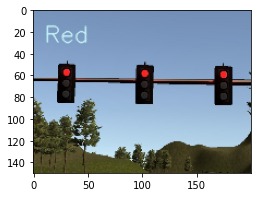

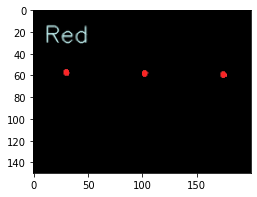

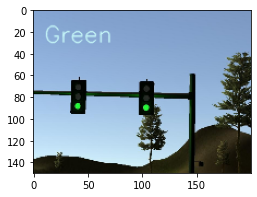

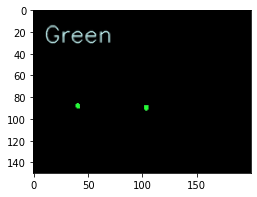

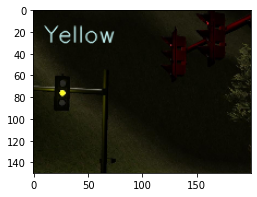

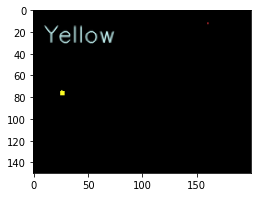

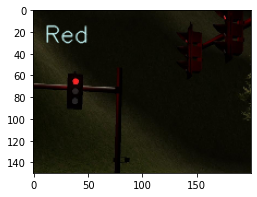

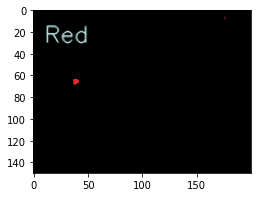

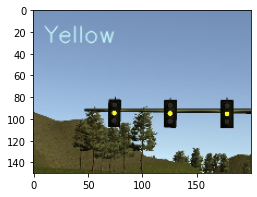

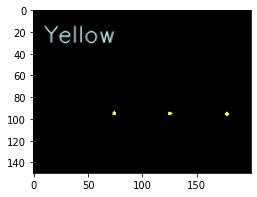

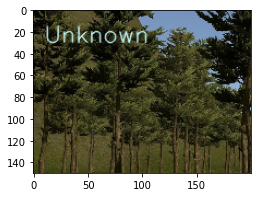

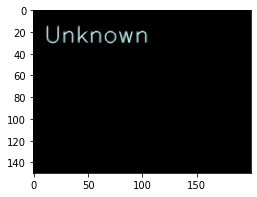

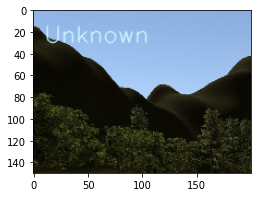

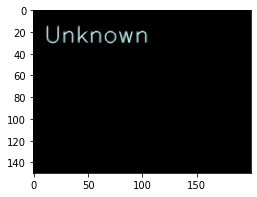

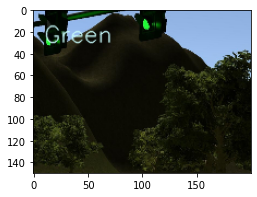

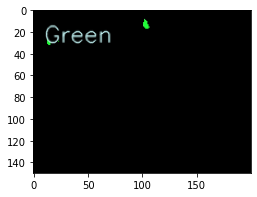

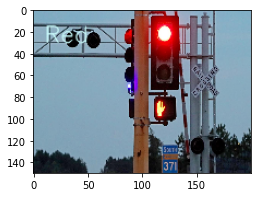

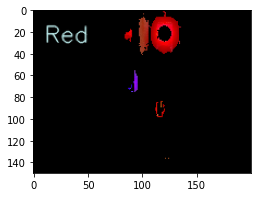

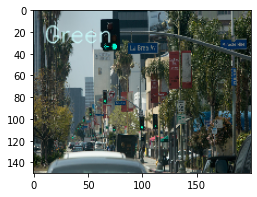

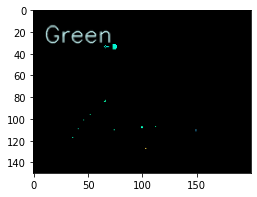

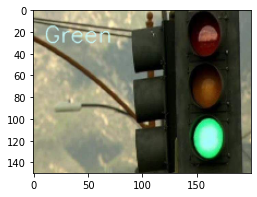

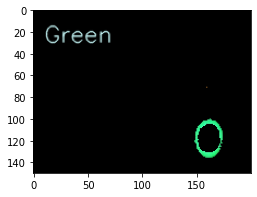

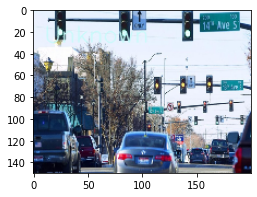

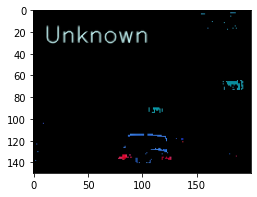

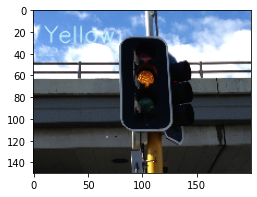

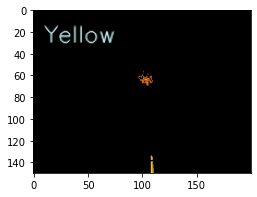

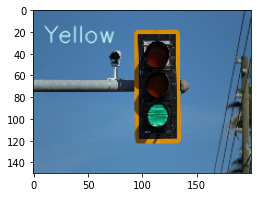

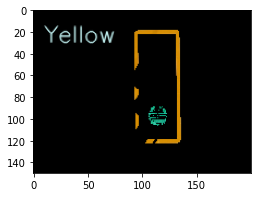

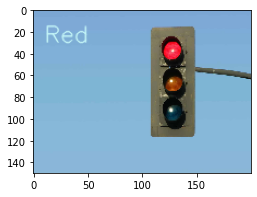

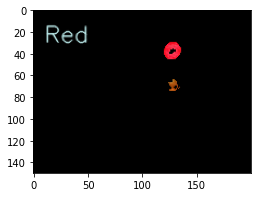

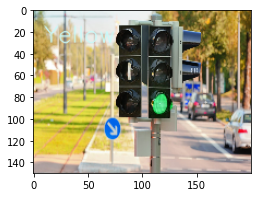

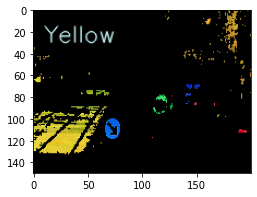

In [133]:
for i in range(len(images)):
    img = cv2.resize(cv2.imread(os.path.join(IMG_PATH, images[i])), (200,150))
    mask = clamp_saturation(img)
    lights_only = np.zeros(img.shape)
    lights_only = cv2.bitwise_and(img, img, mask=mask)
    state = detect_state(lights_only)
    plot_bgr(draw_state(img, state))
    plot_bgr(draw_state(lights_only, state))
    print("State ", state)